# Alphamask

We will put a sunglass on the face of elon musk.

In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

sunglass image dimensions=(100, 300, 4)


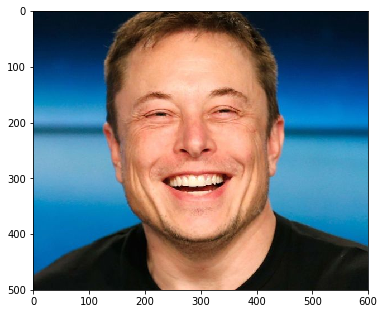

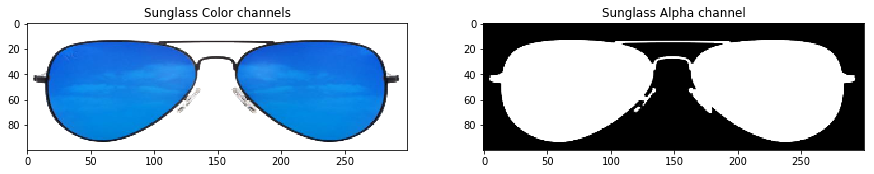

In [5]:
# Load the face image
faceImagePath="musk.jpg"
# Read the image
faceImage=cv2.imread(faceImagePath)
# Display
plt.imshow(faceImage[:,:,::-1])

# Load the sunglasses image with Alpha channel
sunglassImagePath="sunglass.png"
# Read Alpha channel
sunglassImage=cv2.imread(sunglassImagePath,-1)
# Resize it to fit over the eyeregion
sunglassImage=cv2.resize(sunglassImage,(300,100))
print("sunglass image dimensions={}".format(sunglassImage.shape))

# Separate the color and alpha channels
sunglassBGR=sunglassImage[:,:,0:3]
sunglassMask1=sunglassImage[:,:,3]

# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(sunglassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(sunglassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

Text(0.5,1,'Augmented Eye and Sunglass')

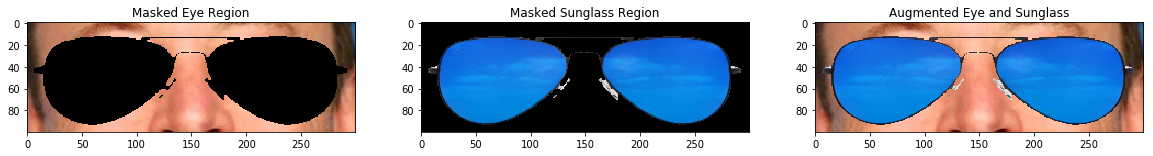

In [13]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask=cv2.merge((sunglassMask1,sunglassMask1,sunglassMask1))

# Make the range [0,1] as we are using arithmetic operations
glassMask=np.uint8(glassMask/255)

# Copy
faceWithGlassesArithmetic=faceImage.copy()

# Eye region
eyeROI=faceWithGlassesArithmetic[150:250,140:440]

# Masked eye region. Multiply the negative of Mask with the eye region 
# to create a hole in the eye region for the sunglass to be placed.
maskedEye=cv2.multiply(eyeROI,(1-glassMask))

# Masked sunglass region
maskedGlass=cv2.multiply(sunglassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

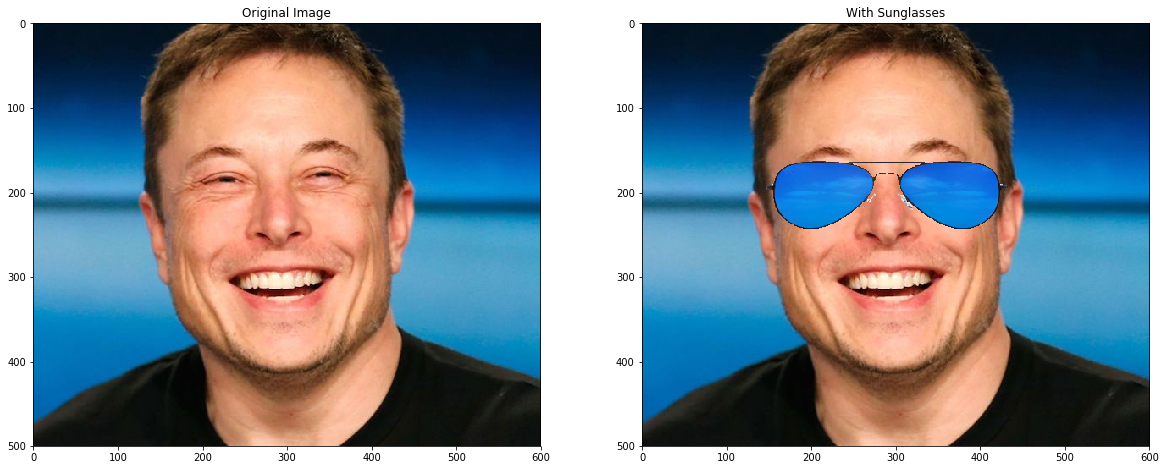

In [14]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[150:250,140:440]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");